In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
%matplotlib notebook

## No potential - 1D density profile

#### To swap between no potentail and quadratic potential change prescribe_grav_potential.cpp line 35 and inputs line 122.  

yt : [INFO     ] 2019-05-23 13:32:26,354 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-23 13:32:26,354 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-23 13:32:26,358 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-23 13:32:26,359 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-23 13:32:26,384 Parameters: current_time              = 2.01941151592212
yt : [INFO     ] 2019-05-23 13:32:26,385 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-23 13:32:26,387 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-23 13:32:26,388 Parameters: domain_right_edge         = [1. 1. 1.]


0.015625 code_length


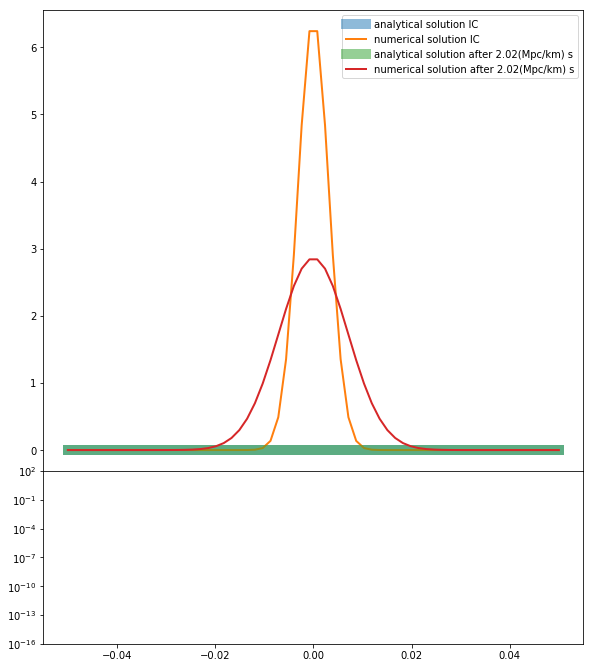

In [4]:
ds = yt.load("plt_gauss_no_gravity_igp00000")
ds2 = yt.load("plt_gauss_no_gravity_igp00100")
ad = ds.all_data()
ad2 = ds2.all_data()
dens = ad[("boxlib","AxDens")]
dens2 = ad2[("boxlib","AxDens")]
x = ad[("boxlib","x")]
x2 = ad2[("boxlib","x")]
y = ad[("boxlib","y")]
y2 = ad2[("boxlib","y")]
z = ad[("boxlib","z")]
z2 = ad2[("boxlib","z")]
dx_half = (ds.domain_right_edge[0] - ds.domain_left_edge[0])/ds.domain_dimensions[0]/2.0
print(dx_half)
index = np.intersect1d(np.where(y==dx_half),np.where(z==dx_half))
index2 = np.intersect1d(np.where(y2==dx_half),np.where(z2==dx_half))
time = ds.current_time
time2 = ds2.current_time
del_t = float(time2 - time)

gamma =0.01917152/2.5
sigmaR = 0.05
hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0
            
## Analytical solution - no potential 
ana_dens = [np.exp(-((x-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for x in x[index]]
ana_dens2 = [np.sqrt(omega/np.pi/hbaroverm/(1+(del_t*omega)**2))*np.exp(-(x-igp)**2*omega/gamma/(1+(del_t*omega)**2))   for x in x2[index2]]

left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x[index], ana_dens, linewidth=10, alpha=0.5, label="analytical solution IC")
topplot.plot(x[index], dens[index], linewidth=2, label="numerical solution IC")
botplot.plot(x[index], abs(dens[index]-ana_dens)/ana_dens)

topplot.plot(x2[index2], ana_dens2, '-', linewidth=10, alpha=0.5, label="analytical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
topplot.plot(x2[index2], dens2[index2], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")
botplot.plot(x2[index2], abs(dens2[index2]-ana_dens2)/ana_dens2)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc =1)
plt.show()


## Quadratic potential - 1D density profile

yt : [INFO     ] 2019-05-23 13:48:22,430 Parameters: current_time              = 0.0
yt : [INFO     ] 2019-05-23 13:48:22,432 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-23 13:48:22,434 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-23 13:48:22,435 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2019-05-23 13:48:22,472 Parameters: current_time              = 1.55065576664581
yt : [INFO     ] 2019-05-23 13:48:22,474 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2019-05-23 13:48:22,476 Parameters: domain_left_edge          = [-1. -1. -1.]
yt : [INFO     ] 2019-05-23 13:48:22,478 Parameters: domain_right_edge         = [1. 1. 1.]


[-3.03746387e+24 -2.94103644e+24 -2.84460902e+24 -2.74818160e+24
 -2.65175417e+24 -2.55532675e+24 -2.45889932e+24 -2.36247190e+24
 -2.26604447e+24 -2.16961705e+24 -2.07318962e+24 -1.97676220e+24
 -1.88033478e+24 -1.78390735e+24 -1.68747993e+24 -1.59105250e+24
 -1.49462508e+24 -1.39819765e+24 -1.30177023e+24 -1.20534281e+24
 -1.10891538e+24 -1.01248796e+24 -9.16060532e+23 -8.19633107e+23
 -7.23205683e+23 -6.26778259e+23 -5.30350834e+23 -4.33923410e+23
 -3.37495985e+23 -2.41068561e+23 -1.44641137e+23 -4.82137122e+22
  4.82137122e+22  1.44641137e+23  2.41068561e+23  3.37495985e+23
  4.33923410e+23  5.30350834e+23  6.26778259e+23  7.23205683e+23
  8.19633107e+23  9.16060532e+23  1.01248796e+24  1.10891538e+24
  1.20534281e+24  1.30177023e+24  1.39819765e+24  1.49462508e+24
  1.59105250e+24  1.68747993e+24  1.78390735e+24  1.88033478e+24
  1.97676220e+24  2.07318962e+24  2.16961705e+24  2.26604447e+24
  2.36247190e+24  2.45889932e+24  2.55532675e+24  2.65175417e+24
  2.74818160e+24  2.84460

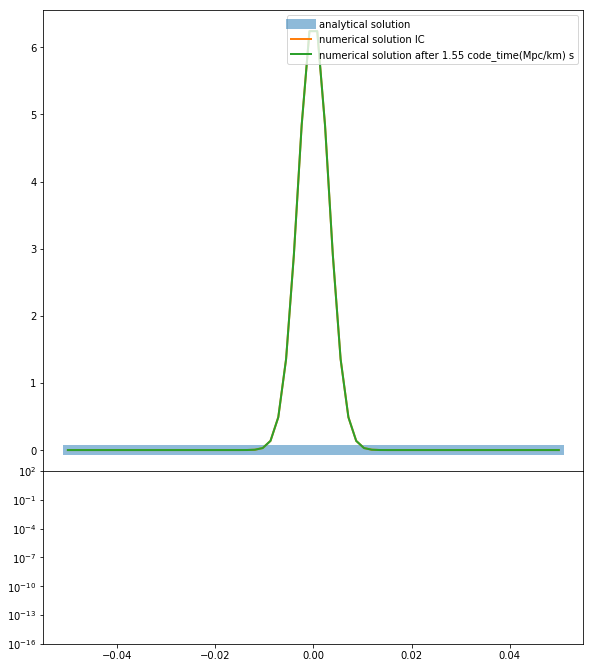

In [16]:
ds = yt.load("plt_gauss_quadpot00000")
ds2 = yt.load("plt_gauss_quadpot00100")
ad = ds.all_data()
ad2 = ds2.all_data()
dens = ad[("boxlib","AxDens")]
dens2 = ad2[("boxlib","AxDens")]
x = ad[("boxlib","x")]
x2 = ad2[("boxlib","x")]
y = ad[("boxlib","y")]
y2 = ad2[("boxlib","y")]
z = ad[("boxlib","z")]
z2 = ad2[("boxlib","z")]
dx_half = (ds.domain_right_edge[0] - ds.domain_left_edge[0])/ds.domain_dimensions[0]/2.0
index = np.intersect1d(np.where(y==dx_half),np.where(z==dx_half))
print(x[index])
index2 = np.intersect1d(np.where(y2==dx_half),np.where(z2==dx_half))
time1 = ds.current_time
time2 = ds2.current_time
del_t = time2 - time1 

hbaroverm = 0.01917152/2.5
omega = 1.0
igp =0.0
            
## Analytical solution - quadtratic potential 
ana_dens = [np.exp(-((j-igp)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm) for j in x[index]]

fig = plt.figure()
left, width = 0.07, 1.25
bottom, height, height2 = 0.1, 1.6, .6
bottom_h = bottom + height2

topplot = plt.axes([left, bottom_h, width, height])
botplot = plt.axes([left, bottom, width, height2])

topplot.plot(x[index], ana_dens, linewidth=10, alpha=0.5, label="analytical solution")
topplot.plot(x[index], dens[index], linewidth=2, label="numerical solution IC")
topplot.plot(x2[index2], dens2[index2], linewidth=2, label="numerical solution after "+"{0:.2f}".format(del_t)+"(Mpc/km) s")

botplot.plot(x2[index2], abs(dens2[index2]-ana_dens)/ana_dens)

botplot.set_yscale('log')
botplot.set_ylim([1e-16,100])
topplot.legend(loc=1)
plt.show()

## Deviation from the analytical solution in the center with time 

In [ ]:
ds = yt.load("plt_gauss_quadpot00000")
time0 = ds.current_time.v
dx_half = (ds.domain_right_edge[0] - ds.domain_left_edge[0])/ds.domain_dimensions[0]/2.0

hbaroverm = 0.01917152/2.5
omega = 1.0

# Analytical solution at center - quadtratic potential 
ana_dens = np.exp(-((dx_half)**2)*omega/hbaroverm)*np.sqrt(omega/np.pi/hbaroverm)

ts = yt.load("plt_gauss_quadpot?????")
times=[(ds.current_time.v-time0) for ds in ts]
center_diffs=[((ds.find_max("AxDens")[0].v-ana_dens)/ana_dens) for ds in ts]

plt.plot(times, center_diffs)
plt.xlabel('time')
plt.ylabel('(dens(max)-analytical)/analytical')
plt.show()